<a href="https://colab.research.google.com/github/vn322/RUDN_Lab_Works/blob/main/stat_dz_4_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
df= pd.read_excel('https://github.com/vn322/RUDN_Lab_Works/raw/refs/heads/main/2.1.8.%20%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5%20%D0%B4%D0%BB%D1%8F%20%D0%B4.%D0%B7.%20%E2%84%964.xls')
df.head(3)

,х1,х2,х3,х4,х5,х6,х7,х8,х9,х10,х11,х12
0,1.44,0.26,0.27,1.46,0.68,0.75,58.42,19074,0.74,0.73,82.44,18.29
1,1.75,0.31,0.45,1.36,0.78,0.87,63.99,27404,0.73,0.85,137.52,18.28
2,1.75,0.29,0.40,1.28,0.99,0.89,91.43,34873,0.78,0.80,76.32,16.83


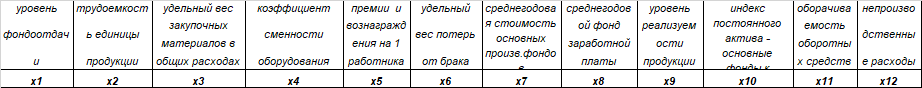

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   х1      20 non-null     float64
 1   х2      20 non-null     float64
 2   х3      20 non-null     float64
 3   х4      20 non-null     float64
 4   х5      20 non-null     float64
 5   х6      20 non-null     float64
 6   х7      20 non-null     float64
 7   х8      20 non-null     int64  
 8   х9      20 non-null     float64
 9   х10     20 non-null     float64
 10  х11     20 non-null     float64
 11  х12     20 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 2.0 KB


In [5]:
df.describe()

,х1,х2,х3,х4,х5,х6,х7,х8,х9,х10,х11,х12
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.467000,0.28400,0.346500,1.362500,1.120000,0.465500,97.930500,27675.750000,0.723000,0.724500,105.737000,20.839000
std,0.350475,0.13036,0.128033,0.172409,0.857278,0.250567,96.314269,20694.117626,0.058409,0.145112,38.674089,4.748305
min,0.880000,0.01000,0.080000,1.090000,0.240000,0.100000,13.580000,7612.000000,0.620000,0.480000,0.820000,12.390000
25%,1.205000,0.23750,0.285000,1.267500,0.677500,0.237500,43.525000,16040.250000,0.682500,0.635000,84.060000,17.800000
50%,1.450000,0.29000,0.340000,1.355000,0.985000,0.515000,58.910000,20157.500000,0.725000,0.740000,107.640000,19.415000
75%,1.727500,0.36250,0.420000,1.462500,1.175000,0.642500,109.332500,35967.250000,0.750000,0.802500,136.170000,23.477500
max,2.250000,0.51000,0.640000,1.870000,4.440000,0.890000,391.270000,94697.000000,0.840000,0.990000,156.960000,30.530000



Факторный анализ - это статистический метод, который исследует скрытые факторы или конструкты, которые могут объяснить связь между набором наблюдаемых переменных. Помогает понять, какие переменные сильно связаны друг с другом и выявить латентные факторы, которые могут оказывать влияние на них.

Латентные факторы - это скрытые переменные или концепции, которые не наблюдаются напрямую, но они влияют на набор видимых переменных.
Представляют собой некоторые общие характеристики или причины, которые объясняют связи между наблюдаемыми переменными. Мы не можем измерить латентные факторы напрямую, но видим их влияние на наши данные через их воздействие на наблюдаемые переменные.

Можно сказать, что латентные факторы - это "скрытые" или "невидимые" факторы, которые влияют на то, что мы видим.


Начнём с того, что вычислим связь между переменными и факторами для случайного числа факторов. Допустим, мы возьмем три. Мы начинаем с полностью случайного выбора числа факторов, чтобы потом уточнить и прийти к наилучшему варианту.

Для этого мы используем уже загруженный нами ранее метод Factor. В качестве аргументов мы указываем наш датафрейм, желаемое число факторов и метод, который мы будем использовать. В данном случае pa соответствует методу главных компонент.

Само преобразование делается в два шага. Сначала мы «создаём» модель с желаемыми параметрами и сохраняем её как переменную, а затем используем метод fit() и вычисляем результат преобразований.

In [6]:
from statsmodels.multivariate.factor import Factor

In [7]:
fa = Factor(df, n_factor=3, method='pa')
res = fa.fit()

Начнем с того, что посмотрим на таблицу факторных нагрузок. Она отражает корреляцию между фактором и переменной. Подсветим все значения больше 0.3 и меньше -0.3. Их мы будем считать достаточными.

**х1** уровень  фондоотдачи

**х2** трудоемкость единицы продукции

**х3** удельный вес закупочных материалов в общих расходах

**х4** коэффициент сменности оборудования

**х5** премии  и вознаграждения на 1 работника

**х6** удельный вес потерь от брака

**х7** среднегодовая стоимость основных произв.фондов

**х8** среднегодовой фонд заработной платы

**х9** уровень реализуемости продукции

**х10** индекс постоянного актива - основные фонды к средствам

**х11** оборачиваемость оборотных средств

**х12** непроизводственные расходы


In [8]:
res.get_loadings_frame(threshold=0.3)

,factor 0,factor 1,factor 2
х2,0.778841,-0.022251,-0.341706
х7,-0.767444,-0.046994,0.095812
х9,-0.755286,0.537678,0.192740
х4,-0.656572,0.136718,-0.334273
х12,0.614324,-0.590480,-0.135175
х5,-0.613280,0.326715,-0.562418
х8,-0.443912,-0.150021,0.045051
х10,0.640570,0.751252,-0.079992
х1,0.608637,0.673021,-0.022549
х3,0.271005,0.154745,0.669671


Мы видим в таблице какой-то первоначальный вариант группировки. Выделенные вместе переменные относятся к одному фактору, указанному в столбце. Мы можем попробовать интерпретировать их.

метод локтя — это график, который мы оцениваем визуально. Чтобы его получить, нужно выполнить следующий код. Нам понадобится пакет matplotlib, так как без него нельзя создать график. Дальше мы используем метод plot_scree(), который применяем к переменной res с результатами прошлых вычислений.

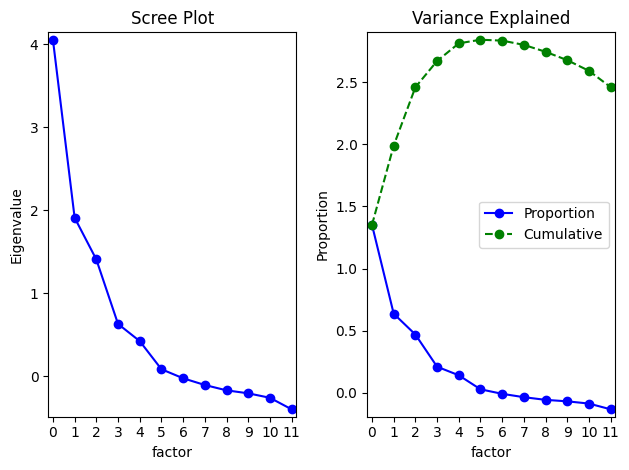

In [9]:
res.plot_scree()
plt.show()

Сам по себе факторный анализ — это метод, который с одной стороны может использовать для получения содержательных интерпретаций, а с другой — как вспомогательный шаг при дальнейшем моделировании. И в первую очередь для снижения размерности